<a href="https://colab.research.google.com/github/vrodr188/Time_Log_analysis/blob/master/Personal%20Time%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Data**

In [1]:
print('Something chaged test')

Something chaged test


In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

**Importing Data from Goole sheets**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

In [ ]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1NERggYtra9a8b86kEliW2yJkqO7YwdrpsNqg0xaJZAM/edit#gid=1754765012')
sheet1 = wb.worksheet('Study_&_Work_log')
data1 = sheet1.get_all_values() #creating a list form the gspread spredsheet

df_timeLog = pd.DataFrame(data1)   #Creating the dataframe from the data list
df_timeLog.columns = df_timeLog.iloc[0]   #Setting the 1st row as columns
df_timeLog = df_timeLog.iloc[1:]          #Assingning the dataframes form row 2 until the end
df_timeLog.tail(5)

,date,time_spended_min,activity_type,specific_1,specific_2,source,if_challenge_score
81,6/25/2020,60,work,meetings,cuautla he leak,conti,
82,6/25/2020,110,coding,python project,time log project,time log project,
83,6/25/2020,75,coding,python challenge,panda,https://www.machinelearningplus.com/python/101...,7/11
84,6/25/2020,30,coding,python challenge,panda,kaggle,4/5
85,6/26/2020,45,work,release audit,honda,conti,


# **Defining Classes and FUnctions**

In [ ]:
#Date label creation
def create_day_label(date):
  months = ['01','02','03','04','05','06','07','08','09','10','11','12']
  months_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

  date = str(date)
  month = ''
  for i in range((len(months))):
    if date.split('-')[1] == months[i]:
      month = months_labels[i]  
  new_day = month + ' ' + date.split('-')[2].split(' ')[0]   
  
  return new_day

## **Period Data Analysis Class**

In [ ]:
class Date_over_a_period():
  import numpy as np
  def __init__(self, data, name, initialDate, finalDate):
    self.totaldata , self.name, self.initialDate, self.finalDate = data, name, initialDate,finalDate    
    self.range_data = data[(data.date >= initialDate) & (data.date <= finalDate)]
    self.total_hrs = self.range_data.groupby('date_label').time_spended_hrs.sum().reset_index()
    self.mean_hrs = np.mean(self.total_hrs)
    self.max_hrs = np.max(self.total_hrs)
    self.min_hrs = np.min(self.total_hrs)
    
    #Grouping the data by date and type of study
    self.groupedBydate_activity = self.range_data.groupby(['date_label','activity_type']).time_spended_min.sum().reset_index()

  def plot_bars_coding_vs_working(self, pallete='BuPu', scale=3, w=30, h=7):
    import seaborn as sns
    import matplotlib.pyplot as plt
    work_coding_data= self.groupedBydate_activity[ (self.groupedBydate_activity.activity_type =='work') | (self.groupedBydate_activity.activity_type =='coding')]
    #Style
  
    plt.figure(figsize=(w,h))

    diverging_colors = sns.color_palette(pallete, scale)
    sns.set_palette(diverging_colors)
    sns.set_context("poster", font_scale = 0.5, rc={"grid.linewidth": 0.3, 'axes.linewidth': 1})
    #Plot
    sns.barplot(x='date_label', y='time_spended_min', hue='activity_type', data=work_coding_data)
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='12') #legend 'list' fontsize 
    plt.title('Work vs Coding Analysis over time')
    plt.show()

  def plot_pie_work_vs_coding(self, pallete='BuPu', scale=3, w=5.5, h=5.5):
    import matplotlib.pyplot as plt

    work= self.groupedBydate_activity.time_spended_min[ (self.groupedBydate_activity.activity_type =='work')]
    coding = self.groupedBydate_activity.time_spended_min[ (self.groupedBydate_activity.activity_type =='coding')]

    time_distribution= [np.array(coding).sum(),np.array(work).sum()]

    
    plt.figure(figsize=(w,h)) 
    explode = (0, 0.1)  
    diverging_colors = sns.color_palette(pallete, scale)
    sns.set_palette(diverging_colors)
    sns.set_context("poster", font_scale = 0.6, rc={"grid.linewidth": 0.6, 'axes.linewidth': 2})
    plt.pie(time_distribution, autopct='%1d%%', labels=['Coding hrs', 'Working hrs'], explode=explode, shadow=True)
    plt.title('Coding vs Working')    
    plt.show()    

  def plot_activities_percentage(self, pallete='BuPu', scale=3, h=5.5, w=5.5):
    import matplotlib.pyplot as plt

    activities_labels = self.groupedBydate_activity.groupby(['activity_type']).time_spended_min.sum().reset_index()
    activities = list(self.groupedBydate_activity.groupby('activity_type').time_spended_min.sum())
    activities_labels = list(activities_labels.activity_type)

    
    plt.figure(figsize=(w,h))  
    #explode = (0, 0.4)  
    diverging_colors = sns.color_palette(pallete, scale)
    sns.set_palette(diverging_colors)
    sns.set_context("poster", font_scale = 0.6, rc={"grid.linewidth": 0.6, 'axes.linewidth': 2})

    #Geting the higer percentage to explode
    higherToExplod=activities.index(max(activities))
    explode1=[]
    for i in range(len(activities)):      
      explode1.append(0) 
    explode1[higherToExplod] = 0.1

    #Ploting the pie chart
    plt.pie(activities, autopct='%1d%%', shadow=True, rotatelabels=1, explode=explode1, startangle=45)
    
    #Setting up Legend
    legend= plt.legend(activities_labels,          title="Ingredients",          loc="center left",          bbox_to_anchor=(1, 0, 0.5, 1)     , fancybox=True     )
    legend.get_title().set_fontsize('14') #legend 'Title' fontsize
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='12') #legend 'list' fontsize 

    plt.title('Activities')    
    plt.show() 

  def plot_total_work(self, pallete='BuPu', scale=3, w=25,h=5):    
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(w,h))
    #Style
    diverging_colors = sns.color_palette(pallete, scale)
    sns.set_palette(diverging_colors)
    sns.set_context("poster", font_scale = 0.5, rc={"grid.linewidth": 0.3, 'axes.linewidth': 1})

    #Plot
    plt.bar(self.total_hrs.date_label, self.total_hrs.time_spended_hrs)
    plt.title('Meaningful Hours Analysis over time')
    plt.axhline(y=6.0, color='grey' , linewidth=0.5, label = "Avg")
    plt.text(y=6 + 0.2, x=0 ,color='black', s = " 6 hrs Goal")
    plt.axhline(y=np.mean(self.total_hrs.time_spended_hrs), color='grey' , linewidth=0.5, label = "Avg")
    plt.text(y=np.mean(self.total_hrs.time_spended_hrs) + 0.2, x=0.9 ,color='black', s = " Avg: {}".format(round(np.mean(self.total_hrs.time_spended_hrs),2)))
    
    plt.ylabel('hours')
    plt.xlabel('Dates')
    plt.show()

  def plot_percentages(self, pallete='BuPu', scale=3, w=25,h=5):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(w,h)) 

    #1st plt -----------------------------------------------------------------------------------------------------------------------------------------
    work= self.groupedBydate_activity.time_spended_min[ (self.groupedBydate_activity.activity_type =='work')]
    coding = self.groupedBydate_activity.time_spended_min[ (self.groupedBydate_activity.activity_type =='coding')]
    time_distribution= [np.array(coding).sum(),np.array(work).sum()] 
   
    ax=plt.subplot(1,3,1)
    explode = (0, 0.1)  
    diverging_colors = sns.color_palette(pallete, scale)
    sns.set_palette(diverging_colors)
    sns.set_context("poster", font_scale = 0.6, rc={"grid.linewidth": 0.6, 'axes.linewidth': 2})
    plt.pie(time_distribution, autopct='%1d%%', labels=['Coding hrs', 'Working hrs'], explode=explode, shadow=True)
    plt.title('Coding vs Working')   


    #2nd Plot----------------------------------------------------------------------------------------------------------------------------------------
    activities_labels = self.groupedBydate_activity.groupby(['activity_type']).time_spended_min.sum().reset_index()
    activities = list(self.groupedBydate_activity.groupby('activity_type').time_spended_min.sum())
    activities_labels = list(activities_labels.activity_type)
    bx=plt.subplot(1,3,2)
    sns.set_context("poster", font_scale = 0.6, rc={"grid.linewidth": 0.6, 'axes.linewidth': 2})

    #Geting the higer percentage to explode
    higherToExplod=activities.index(max(activities))
    explode1=[]
    for i in range(len(activities)):      
      explode1.append(0) 
    explode1[higherToExplod] = 0.1

    #Ploting the pie chart
    plt.pie(activities, autopct='%1d%%', shadow=True, rotatelabels=1, explode=explode1, startangle=45)
    
    #Setting up Legend
    legend= plt.legend(activities_labels,          title="Activities",          loc="center left",          bbox_to_anchor=(1, 0, 0.5, 1)     , fancybox=True     )
    legend.get_title().set_fontsize('14') #legend 'Title' fontsize
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='12') #legend 'list' fontsize 
    plt.title('All Activities') 

    #3rd Plot---------------------------------------------------------------------------------------------------------------------------------------
    cx=plt.subplot(1,3,3)
    over_sixhr = np.count_nonzero(self.total_hrs.time_spended_hrs[self.total_hrs.time_spended_hrs>6])
    total = len(self.total_hrs.time_spended_hrs)
    plt.pie([over_sixhr,total], labels=['Over 6 hr', 'Short of 6hr'],autopct='%1d%%', shadow=True, rotatelabels=0, explode=(0,0.1), startangle=45)
    
    #Setting up Legend
    plt.title('Percentage over 6hr days')

    plt.show() 

    return None
    


# **Procesing data**

In [ ]:
#Converting the min values to interger
df_timeLog['time_spended_min'] = df_timeLog['time_spended_min'].apply(lambda x: int(x) if x != "" else x)

#Creating Column Hrs
df_timeLog['time_spended_hrs'] = df_timeLog['time_spended_min'].apply(lambda x: round( x / 60.0 ,2))

#Converting date data Types
df_timeLog['date'] = pd.to_datetime(df_timeLog['date'], format='%m/%d/%Y')

#Creating day label column
df_timeLog['day'] = df_timeLog['date'].apply(lambda x: int(str(x).split('-')[2].split(' ')[0]))

#Creating date label column
df_timeLog['date_label'] = df_timeLog['date'].apply(create_day_label)

#create column year
df_timeLog['year'] = df_timeLog['date'].apply(lambda x: int(str(x).split('-')[0]))

In [ ]:
df_timeLog.head(5)

,date,time_spended_min,activity_type,specific_1,specific_2,source,if_challenge_score,time_spended_hrs,day,date_label,year
1,2020-06-06,90,coding,python tutorial,list,codeacademy,,1.50,6,Jun 06,2020
2,2020-06-07,60,coding,python tutorial,functions,codeacademy,,1.00,7,Jun 07,2020
3,2020-06-08,30,coding,python challenge,list,codeacademy,7/10,0.50,8,Jun 08,2020
4,2020-06-08,35,coding,python tutorial,reading files,codeacademy,,0.58,8,Jun 08,2020
5,2020-06-08,40,coding,python tutorial,reading files challenge,codeacademy,,0.67,8,Jun 08,2020


# **Month of June 2020**

In [ ]:
june=Date_over_a_period(df_timeLog, 'June','2020-06-15','2020-06-25')

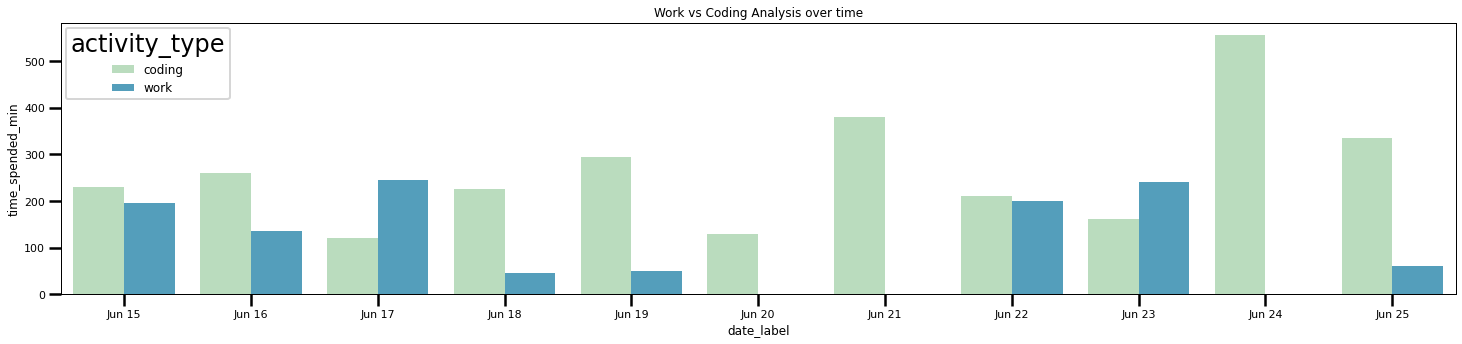

In [ ]:
june.plot_bars_coding_vs_working(w=25, h=5, pallete='GnBu', scale=2 )

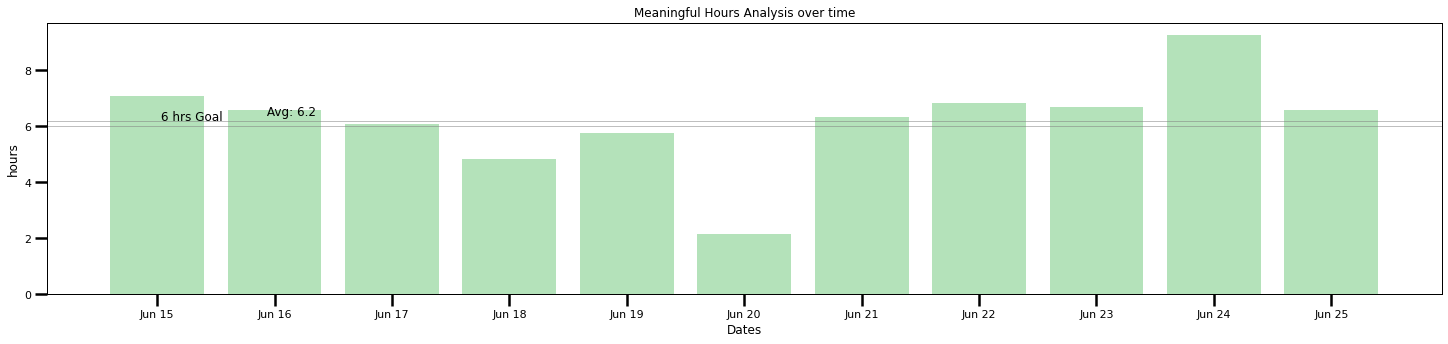

In [ ]:
june.plot_total_work(w=25, h=5, pallete='GnBu', scale=2 )

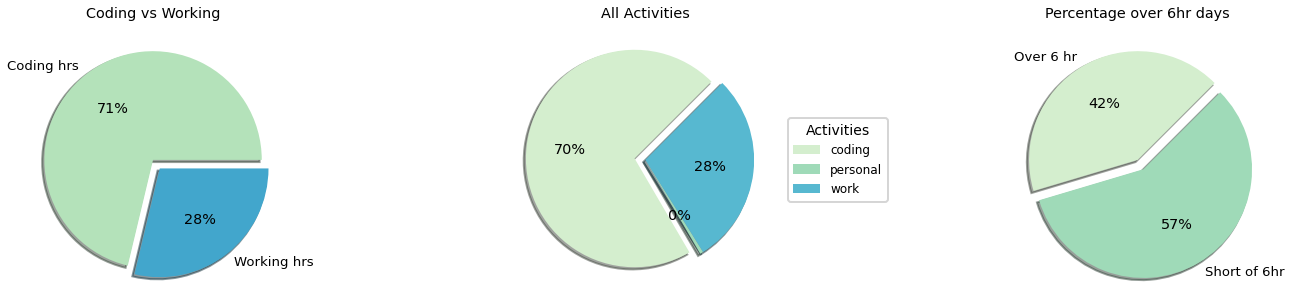

In [ ]:
june.plot_percentages(w=25, h=5, scale=4, pallete='GnBu' )